# Overview

* the goal of this notebook is to download and display WISE images for APPSS galaxies
* we will use the WISE images to estimate the stellar mass of galaxiesy
* there are two samples of galaxies: APPSS sample, and the supernova host galaxy sample



In [1]:
import os
import sys
import numpy as np
from matplotlib import pyplot as plt
from astropy.table import Table
from astropy.io import fits
from PIL import Image

In [2]:
homedir = os.getenv("HOME")
sys.path.append(homedir+"/github/APPSS/python/")

In [3]:
from image_functions import *

In [4]:
UNWISE_PIXSCALE = 2.75
LEGACY_PIXSCALE = 1


# Set the working directory to something other than github directory

In [5]:
os.chdir(homedir+"/research/APPSS/mstar/")

# Read in catalog of galaxies

In [6]:
# APPSS catalogs from Catie

appscat_filename = homedir+"/research/APPSS/sample/appss123.catalog.211115.csv"
apps = Table.read(appscat_filename)

In [7]:
apps

hiname,agcnum,othername,HIra,HIdec,OCra,OCdec,hv50,hverr,iw50,iwerr,iv20,flux,fluxerr,sn,rms,icodelbw,appss,specfile,icodea100
str16,int64,str7,float64,float64,float64,float64,int64,int64,int64,int64,int64,float64,float64,float64,float64,int64,str3,str26,int64
H215143.8+251518,11834,472-014,327.93249512,25.25499916,327.93249512,25.25499916,3261,2,192,3,211,2.52,0.06,37.3,1.09,8,ap3,H215143.8+251518,1
H224250.1+325936,12165,--,340.70874023,32.99333191,340.70874023,32.99333191,6522,5,351,7,361,1.97,0.11,16.1,1.45,8,ap3,H224250.1+325936,1
S220002.9+304808,322491,--,330.01208496,30.8022213,330.01208496,30.8022213,12545,4,204,6,218,0.58,0.06,9.6,0.74,8,ap2,S220002.9+304808,0
S220415.3+293244,322494,--,331.06375122,29.54555511,331.06375122,29.54555511,4870,2,126,3,131,0.27,0.04,6.3,0.76,8,ap2,S220415.3+293244,0
S220440.1+245549,323399,--,331.16708374,24.93027687,331.16708374,24.93027687,6145,6,132,8,148,0.45,0.05,8.2,0.91,8,ap2,S220440.1+245549,0
S220801.7+291527,323400,--,332.00708008,29.25749969,332.00708008,29.25749969,2894,4,31,6,38,0.1,0.01,6.9,0.6,8,ap3,S220801.7+291527_2peak,0
S220816.5+304000,322496,--,332.0687561,30.66666603,332.0687561,30.66666603,1115,1,45,1,59,0.5,0.02,21.7,0.6,8,ap2,S220816.5+304000,0
S220842.2+245624,321315,--,332.17584229,24.93999863,332.17584229,24.93999863,6356,2,151,3,160,0.44,0.04,10.9,0.6,8,ap2,S220842.2+245624,4
S220059.5+273651,321196,--,330.24789429,27.61416626,330.24789429,27.61416626,3504,5,110,7,121,0.6,0.04,12.9,0.99,8,ap3,S220059.5+273651_2019,1


# Code to download a WISE image

In [8]:
# select first galaxy in the list as a test
ra = apps['OCra'][0]
dec = apps['OCdec'][0]
galname = 'AGC'+str(apps['agcnum'][0])


In [9]:
!ls
# run this to start over
! rm AGC11834*
!ls

AGC11834-legacy-120-g.fits
AGC11834-legacy-120.jpg
AGC11834-legacy-120-r.fits
AGC11834-legacy-120-z.fits
AGC11834-unwise-3283p257-w1-img-m.fits
AGC11834-unwise-3283p257-w1-img-m.std.fits
AGC11834-unwise-3283p257-w1-invvar-m.fits
AGC11834-unwise-3283p257-w1-n-m.fits
AGC11834-unwise-3283p257-w2-img-m.fits
AGC11834-unwise-3283p257-w2-img-m.std.fits
AGC11834-unwise-3283p257-w2-invvar-m.fits
AGC11834-unwise-3283p257-w2-n-m.fits
AGC11834-unwise-3283p257-w3-img-m.fits
AGC11834-unwise-3283p257-w3-img-m.std.fits
AGC11834-unwise-3283p257-w3-invvar-m.fits
AGC11834-unwise-3283p257-w3-n-m.fits
AGC11834-unwise-3283p257-w4-img-m.fits
AGC11834-unwise-3283p257-w4-img-m.std.fits
AGC11834-unwise-3283p257-w4-invvar-m.fits
AGC11834-unwise-3283p257-w4-n-m.fits


In [10]:
# set image size
imsize_arcsec = 120 # length/width of image in arcseconds
imsize_pixels_legacy = round(imsize_arcsec/LEGACY_PIXSCALE)
imsize_pixels_unwise = round(imsize_arcsec/UNWISE_PIXSCALE)

In [11]:

t = get_unwise_image(ra,dec,galid=galname,makeplots=False,imsize=str(imsize_pixels_unwise))
imagefiles = t[0]
noisefiles = t[1]
imagefiles.sort()
noisefiles.sort()

wise image size =  44
downloading unwise images
http://unwise.me/cutout_fits?version=allwise&ra=327.93250&dec=25.25500&size=44&bands=1234
['unwise-3283p257-w1-img-m.fits', 'unwise-3283p257-w1-invvar-m.fits.gz', 'unwise-3283p257-w1-n-m.fits.gz', 'unwise-3283p257-w1-std-m.fits.gz', 'unwise-3283p257-w2-img-m.fits', 'unwise-3283p257-w2-invvar-m.fits.gz', 'unwise-3283p257-w2-n-m.fits.gz', 'unwise-3283p257-w2-std-m.fits.gz', 'unwise-3283p257-w3-img-m.fits', 'unwise-3283p257-w3-invvar-m.fits.gz', 'unwise-3283p257-w3-n-m.fits.gz', 'unwise-3283p257-w3-std-m.fits.gz', 'unwise-3283p257-w4-img-m.fits', 'unwise-3283p257-w4-invvar-m.fits.gz', 'unwise-3283p257-w4-n-m.fits.gz', 'unwise-3283p257-w4-std-m.fits.gz']


# Code to download legacy images

In [12]:
bands = ['g','r','z']
legimfiles = []

for i,b in enumerate(bands):
    if i == 0:
        # only need to download this once
        getjpg = True
    else:
        getjpg = False
    t = get_legacy_images(ra,dec,galid=galname,band=b,makeplots=False,imsize=str(imsize_pixels_legacy))
    if i == 0:
        legimfiles.append(t[0])
        legjpgfile = t[1]
    else:
        legimfiles.append(t[0])
print(legimfiles)
print(legjpgfile)

legacy imsize =  120
retrieving  AGC11834-legacy-120.jpg
retrieving  AGC11834-legacy-120-g.fits
legacy imsize =  120
previously downloaded  AGC11834-legacy-120.jpg
retrieving  AGC11834-legacy-120-r.fits
legacy imsize =  120
previously downloaded  AGC11834-legacy-120.jpg
retrieving  AGC11834-legacy-120-z.fits
['AGC11834-legacy-120-g.fits', 'AGC11834-legacy-120-r.fits', 'AGC11834-legacy-120-z.fits']
AGC11834-legacy-120.jpg


# Plot cutouts

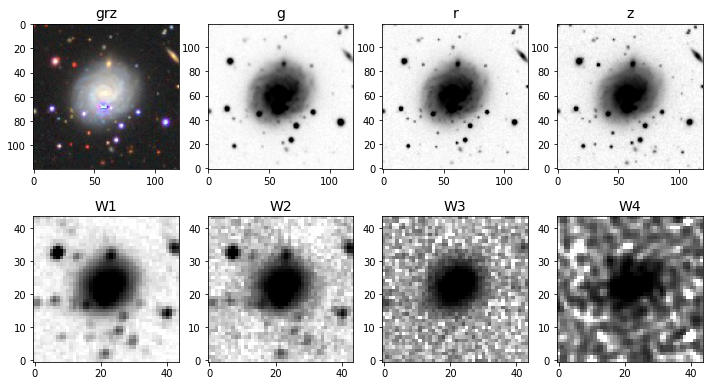

In [22]:
# make a plot
plt.figure(figsize=(12,6.5))

# concatinate lists
legacy_images = [legjpgfile]+legimfiles
imnames = ['grz','g','r','z']
# plot legacy images in top row
for i,im in enumerate(legacy_images):
    plt.subplot(2,4,i+1)
    if i == 0:
        # display jpg
        t = Image.open(im)
        plt.imshow(t,origin='upper')
    else:
        data = fits.getdata(im)
        display_image(data,lowrange=False,percent=95)
    plt.title(imnames[i],fontsize=14)

# plot WISE images
imnames = ['W1','W2','W3','W4']
for i,im in enumerate(imagefiles):
    plt.subplot(2,4,4+i+1)
    data = fits.getdata(im)
    display_image(data,percent=92)
    plt.title(imnames[i],fontsize=14)